In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Politifactcleaned.xlsx')

In [3]:
df2=pd.read_excel('/content/drive/MyDrive/LabelData.xlsx')

In [4]:
df3=pd.read_excel('/content/drive/MyDrive/Labelled Reddit Data.xlsx')

In [5]:
df4=pd.read_excel('/content/drive/MyDrive/FYP VIVA Presentation/unlabelled data2.xlsx')

In [6]:
df.head()

,Lemma,label
0,Video show Nancy Pelosi say give shoot kill ...,False
1,George Soros ban Russia Pakistan Turkey Hung...,False
2,U N call decriminalize sex minor,False
3,Scientists struggle understand Antarctica wa...,False
4,La Reserva Federal present su nuevo sistema ...,False


In [7]:
df2.head()

,title,Lemma,Labels
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump wish Americans Happy New Year l...,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin ...,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,Friday reveal former Milwaukee Sheriff David...,Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,Christmas day Donald Trump announce would ba...,Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis use annual Christmas Day messag...,Fake


In [8]:
df3.head()

,Unnamed: 0,Lemma,clusters,Manual Label,MANUAL,Match,Word_Count,Unnamed: 7,Unnamed: 8
0,0,Megathread Joe Biden Projected Defeat Presid...,0,1,True,NaN,12,NaN,NaN
1,1,Mitch McConnell Lose Control Senate Democrat...,1,1,True,NaN,9,"Note: 0=FALSE , 1=TRUE",NaN
2,2,Megathread House Votes Impeach President Don...,0,1,True,NaN,8,NaN,NaN
3,3,Trump Threatens Leave Country Loses Biden,0,1,True,NaN,6,NaN,NaN
4,9,Virginia governor make Election Day holiday ...,1,1,True,NaN,9,NaN,NaN


In [9]:
df4.head()

,Unnamed: 0,Lemma,clusters,MANUAL,Match,Word_Count,Unnamed: 6
0,4,Demands Kushner Resign Staggering Level Depr...,1,-,NaN,28,NaN
1,5,million people sign petition call KKK declar...,1,-,NaN,9,Note: For match the green means it matches wit...
2,6,Report Biden Admin Discovers Trump Zero Plan...,0,-,NaN,10,NaN
3,7,Biden Pennsylvania lead big enough avoid aut...,1,-,NaN,8,NaN
4,8,Donald Trump Left White House Time Good,0,-,NaN,7,NaN


In [10]:
df5=df2[['Lemma','Labels']]

In [11]:
df6=df3[['Lemma','Manual Label']]

In [12]:
df6 = df6.rename(columns={'Manual Label': 'Label'})

In [13]:
df7=df4[['Lemma','clusters']]

In [14]:
df7 = df7.rename(columns={'clusters': 'Label'})

In [15]:
df6.head()

,Lemma,Label
0,Megathread Joe Biden Projected Defeat Presid...,1
1,Mitch McConnell Lose Control Senate Democrat...,1
2,Megathread House Votes Impeach President Don...,1
3,Trump Threatens Leave Country Loses Biden,1
4,Virginia governor make Election Day holiday ...,1


In [16]:
df7.head()

,Lemma,Label
0,Demands Kushner Resign Staggering Level Depr...,1
1,million people sign petition call KKK declar...,1
2,Report Biden Admin Discovers Trump Zero Plan...,0
3,Biden Pennsylvania lead big enough avoid aut...,1
4,Donald Trump Left White House Time Good,0


In [17]:
df5.head()

,Lemma,Labels
0,Donald Trump wish Americans Happy New Year l...,Fake
1,House Intelligence Committee Chairman Devin ...,Fake
2,Friday reveal former Milwaukee Sheriff David...,Fake
3,Christmas day Donald Trump announce would ba...,Fake
4,Pope Francis use annual Christmas Day messag...,Fake


In [18]:
df5["Label"]=df5["Labels"].apply=[0 if i== "Fake" else 1 for i in df5.Labels]
df5=df5.drop("Labels",axis=1)
df5.head()

,Lemma,Label
0,Donald Trump wish Americans Happy New Year l...,0
1,House Intelligence Committee Chairman Devin ...,0
2,Friday reveal former Milwaukee Sheriff David...,0
3,Christmas day Donald Trump announce would ba...,0
4,Pope Francis use annual Christmas Day messag...,0


In [19]:
df['Label']=df['label'].apply=[0 if i== "False" else 1 for i in df.label]
df=df.drop("label",axis=1)


In [20]:
df.head()

,Lemma,Label
0,Video show Nancy Pelosi say give shoot kill ...,1
1,George Soros ban Russia Pakistan Turkey Hung...,1
2,U N call decriminalize sex minor,1
3,Scientists struggle understand Antarctica wa...,1
4,La Reserva Federal present su nuevo sistema ...,1


In [21]:
import pandas as pd
Data=pd.concat([df,df5,df6],axis=0)

In [22]:
Data.head()

,Lemma,Label
0,Video show Nancy Pelosi say give shoot kill ...,1
1,George Soros ban Russia Pakistan Turkey Hung...,1
2,U N call decriminalize sex minor,1
3,Scientists struggle understand Antarctica wa...,1
4,La Reserva Federal present su nuevo sistema ...,1


In [23]:
Data.shape

(127420, 2)

In [24]:
Data.to_excel('Compile_Label_Data.xlsx', index=False)
from google.colab import files
files.download('Compile_Label_Data.xlsx')

KeyboardInterrupt: ignored

In [25]:
df7.shape

(6645, 2)

In [26]:
from sklearn.utils import resample
Data_sample = resample(Data, n_samples=50000, random_state=42)

In [27]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_val, y_train, y_val = train_test_split(Data_sample['Lemma'], Data_sample['Label'], test_size=0.3,random_state=42)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train.ravel())
X_val = vectorizer.transform(X_val.ravel())

In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [30]:
#rf = RandomForestClassifier(n_estimators=700,min_samples_split= 2, random_state=42,class_weight='balanced')
svm = SVC(kernel='poly', C=10, gamma='scale', random_state=42,class_weight='balanced')
svm.fit(X_train, y_train)
#gb = GradientBoostingClassifier(learning_rate= 1, max_depth= 5, n_estimators= 700)
#nb = MultinomialNB(alpha = 0.01, fit_prior= True)
#dt = DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 1, min_samples_split= 2,class_weight='balanced')
#dt.fit(X_train, y_train)

SVC(C=10, class_weight='balanced', kernel='poly', random_state=42)

In [ ]:
#from sklearn.ensemble import  VotingClassifier
#ensemble = VotingClassifier([ ('svm', svm)], voting='hard')
#ensemble.fit(X_train, y_train)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators=700,min_samples_split= 2, random_state=42,class_weight='balanced')
#rf.fit(X_train, y_train)

In [ ]:
#from sklearn.ensemble import  GradientBoostingClassifier
#gb =GradientBoostingClassifier(learning_rate= 1, max_depth= 5, n_estimators= 700)
#gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=700)

In [31]:
from sklearn.metrics import classification_report
y_pred2 = svm.predict(X_val)
print(classification_report(y_val, y_pred2))

              precision    recall  f1-score   support

           0       0.61      0.41      0.49      6996
           1       0.60      0.77      0.67      8004

    accuracy                           0.60     15000
   macro avg       0.60      0.59      0.58     15000
weighted avg       0.60      0.60      0.59     15000



In [ ]:
X_test = df7['Lemma']
X_test_transformed = vectorizer.transform(X_test)
y_pred_test = svm.predict(X_test_transformed)

In [ ]:
y_true=df7['Label']

In [ ]:
print(classification_report(y_true, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       880
           1       0.87      1.00      0.93      5765

    accuracy                           0.87      6645
   macro avg       0.43      0.50      0.46      6645
weighted avg       0.75      0.87      0.81      6645



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
cm = confusion_matrix(y_val,y_pred2)

In [35]:
labels = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

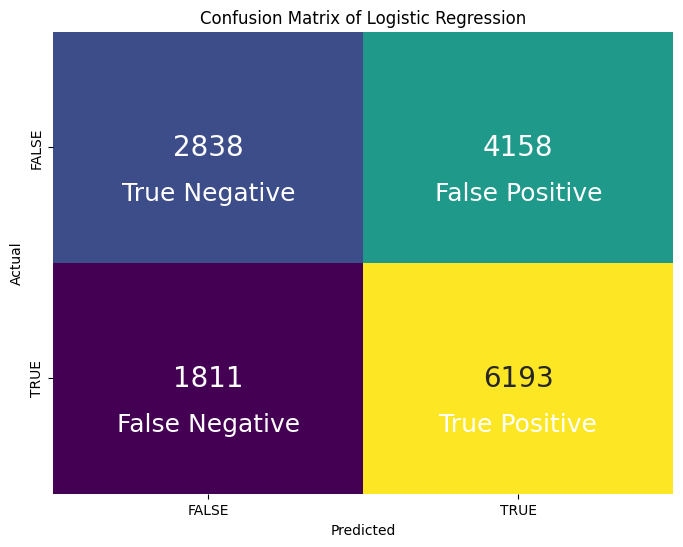

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="viridis", fmt="d", cbar=False,
            xticklabels=['FALSE', 'TRUE'],
            yticklabels=['FALSE', 'TRUE'],annot_kws={"size": 20})
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.7, labels[i][j], ha='center', va='center', fontsize=18, color='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [37]:
from sklearn.calibration import calibration_curve
true_prob, pred_prob = calibration_curve(y_val,y_pred2, n_bins=10)

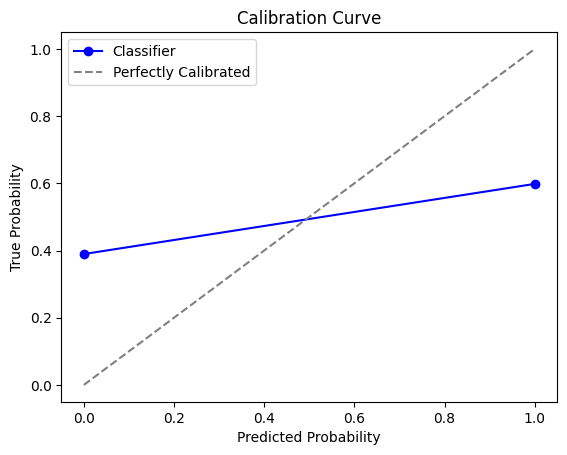

In [38]:
plt.plot(pred_prob, true_prob, marker='o', linestyle='-', color='blue', label='Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [41]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [42]:
scores = cross_val_score(svm, X_train,y_train, cv=kfold, scoring='accuracy')

In [43]:
average_accuracy = scores.mean()
average_accuracy

0.5981142857142857

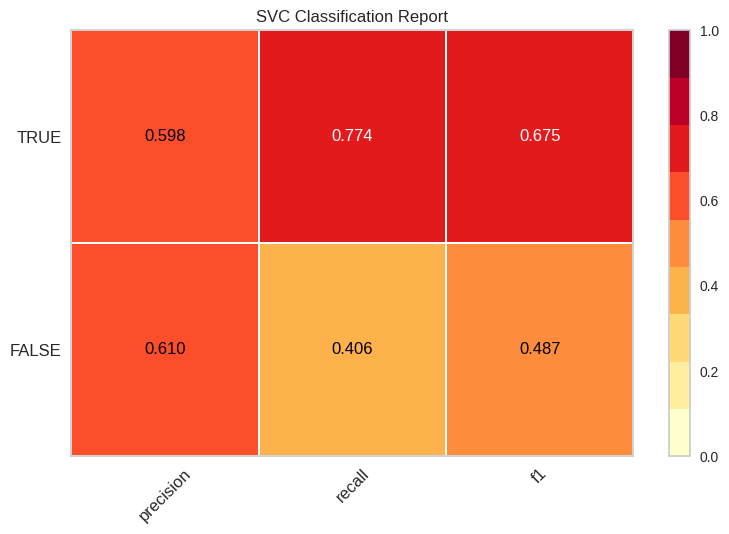

<Axes: title={'center': 'SVC Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(svm, classes=['FALSE', 'TRUE'])
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: ignored

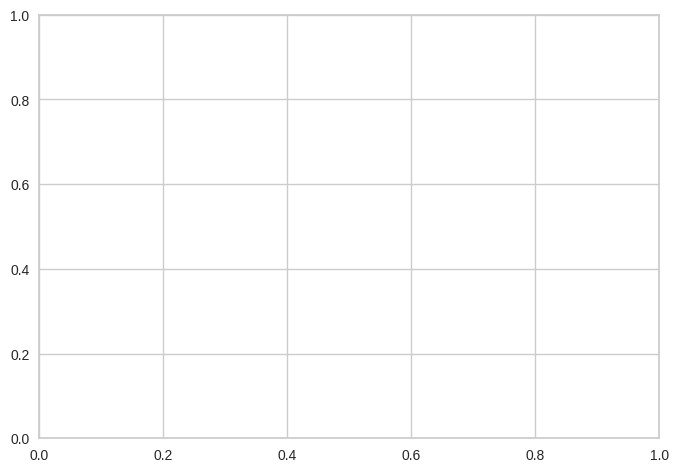

In [39]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    svm, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(X_train, y_train)
lc_viz.show()

In [ ]:
import random


random_index = random.randint(0, len(df)-1)
text =df.iloc[random_index]['Lemma']
text_transformed = vectorizer.transform([text])
label_pred = svm.predict(text_transformed)
print("Text: ", text)
if label_pred == 1:
    print('The text is classified as TRUE')
else:
    print('The text is classified as FALSE')
#print("Predicted Label: ", label_pred[0])

Text:    Black Friday originate enslaved people sell discount boost economy
The text is classified as TRUE


In [ ]:
from sklearn.model_selection import GridSearchCV

dt_params = {'max_depth': [2, 4, 6, 8],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 3, 4]}

dt_grid = GridSearchCV(dt, dt_params, cv=5,n_jobs=1)
dt_grid.fit(X_train, y_train)
print("Decision tree best params:", dt_grid.best_params_)

Decision tree best params: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
